In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline as mis
import matplotlib as mpl
mpl.rcParams.update({
    'font.family' : 'STIXGeneral',
    'mathtext.fontset' : 'stix',
    'xtick.direction' : 'in' ,
    'xtick.labelsize' : 13 ,
    'xtick.top' : True ,
    'ytick.direction' : 'in' ,
    'ytick.labelsize' : 13 ,
    'ytick.right' : True ,
    'axes.labelsize' : 16,
    'legend.frameon' : False,
    'legend.fontsize' : 13,
    'legend.handlelength' : 1.5,
    'savefig.dpi' : 600 
})

In [13]:
mx = 14.4 * 1e-2
p1_x = np.array([64.1, 65, 66, 67.1, 69, 70, 71.6, 72.5, 74, 76.1, 76.6])*1e-2 -mx #m
p1_y = np.array([1.89, 1.9, 1.94, 1.97, 1.99, 2, 2.03, 2.05, 2.06, 2.08, 2.1])/2 #mm

p2_x = np.array([70.5, 73.7, 74, 76.5, 80.5, 83.2, 83.8, 84.5, 85])*1e-2 -mx #m
p2_y = np.array([2.85, 3.32, 3.32, 3.33, 3.24,3.04, 2.57, 2.3, 2.17]) - 0.9 #V

p3_x = np.array([4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.25,6.5,6.75]) #mA
p3_y = np.array([3.25,3.31,3.36,3.39,3.40,3.43,3.43,3.43,3.44,3.43,3.42,3.41]) #mV

[0.62229703 0.74445703] [0.00117479 0.00033805]
1083.494909899056
5.861347208100167
[0.48451908 0.90420325] [4.83823020e-04 6.19372135e-05]
1244.4942156706195
5.343133693389329


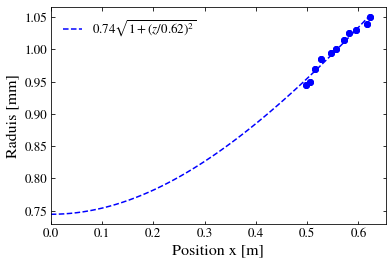

In [106]:
def func(z, z_r, w_0):
    return w_0*np.sqrt(1+(z/z_r)**2)
p, pcov = curve_fit(func, p1_x, p1_y, p0=[0.5, 10])
xdata = np.linspace(0, 0.62)
plt.plot(p1_x, p1_y, 'bo')
txt = r"$%.2f\sqrt{1+(z/%.2f)^2}$"%(p[1], p[0])
plt.plot(xdata, func(xdata, *p), 'b--', label=txt)
print(p, np.diag(pcov))
print(np.pi*p[0]*p[1]**2*1e3)
print(np.pi*np.sqrt((2*p[1] /p[0] *pcov[1,1])**2+(p[1]**2 /p[0]**2 *pcov[0,0])**2)*1e3)

mid = (80.7-14.4)/2 * 1e-2
def func(z, z_r, w_0):
    return w_0*np.sqrt(1+((z-mid)/z_r)**2)
p, pcov = curve_fit(func, p1_x, p1_y, p0=[0.5, 0.8])
xdata = np.linspace(0, 0.62)
plt.plot(p1_x, p1_y, 'bo')
txt = r"$%.2f\sqrt{1+((z-%.2f)/%.2f)^2}$"%(p[1], mid, p[0])
#plt.plot(xdata, func(xdata, *p), 'b:', label=txt)
print(p, np.diag(pcov))
print(np.pi*p[0]*p[1]**2*1e3)
print(np.pi*np.sqrt((2*p[1] /p[0] *pcov[1,1])**2+(p[1]**2 /p[0]**2 *pcov[0,0])**2)*1e3)

plt.xlim(0)
plt.legend()
plt.xlabel('Position x [m]')
plt.ylabel('Raduis [mm]')
plt.savefig("11_1.png", bbox_inches='tight')

[ 2.43835108  1.44756587 54.77010441  0.70879517] [ 7.31460202e-04 -1.28110352e+14  1.47778920e+02 -2.03807742e+10]


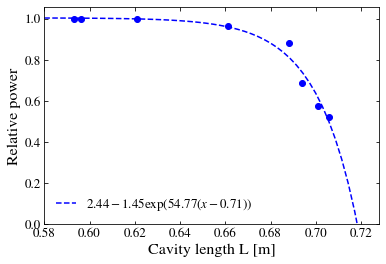

In [68]:
plt.plot(p2_x, p2_y/np.max(p2_y), 'bo')
xdata = np.linspace(0.58, 0.72)
def func(x, a, b, c, d):
    return a-b*np.exp(c*(x-d))
p, pcov = curve_fit(func, p2_x[1:], p2_y[1:], p0=[1,1,1,1])
print(p, np.diag(pcov))
txt = r"$%.2f-%.2f \exp({%.2f(x-%.2f)})$" % (p[0], p[1], p[2], p[3])
plt.plot(xdata, func(xdata, *p)/np.max(p2_y), 'b--', label=txt)

plt.xlim(0.58)
plt.ylim(0)
plt.legend()
plt.xlabel('Cavity length L [m]')
plt.ylabel('Relative power')
plt.savefig("11_2.png", bbox_inches='tight')

[  3.43086822 558.31504223   2.00213034] [2.92377407e-05 3.76382245e+05 7.42514692e-02]


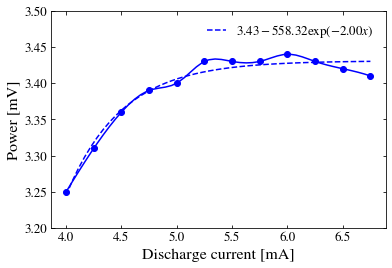

In [69]:
def func(x, a, b, c):
    return a-b*np.exp(-c*x)
p, pcov = curve_fit(func, p3_x, p3_y, p0=[2,2,2])

print(p, np.diag(pcov))
xdata = np.linspace(4, 6.75)

plt.plot(p3_x, p3_y, 'bo')
interp = mis(p3_x, p3_y)
plt.plot(xdata, interp(xdata), 'b-')
txt = r"$%.2f-%.2f\exp(-%.2f x)$"%(p[0], p[1], p[2])
plt.plot(xdata, func(xdata, *p), 'b--', label=txt)
plt.ylim(3.2, 3.5)
plt.legend()
plt.xlabel('Discharge current [mA]')
plt.ylabel('Power [mV]')
plt.savefig("11_3.png", bbox_inches='tight')